In [2]:
""" 
Data exploration and visualization

Part of the insights and code in this part come from the Kaggle discussion forum.
In that way, I was able to save time to focus on the details for improving the model.

"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [40]:
df = pd.read_csv('../data/train.csv')
df.head() # Display information
df.shape # Display the shape of the data

(20758, 18)

In [41]:
df['NObeyesdad'].value_counts()
# The output data distribution is balanced

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [42]:
df.describe()
# - The data is not normalized
# - Some of the numerical features are actually categorical.
# - Could be that the data generator provided convert the categorical data.

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [43]:
continuous_vars = []
categorical_vars = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_vars.append(column)
    else:
        continuous_vars.append(column)
        
print("Continuous Variables:", continuous_vars, len(continuous_vars), "\n")
print("Categorical Variables:", categorical_vars, len(categorical_vars), "\n")

Continuous Variables: ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] 9 

Categorical Variables: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'] 9 



In [7]:
# Plot the distribuition of a column
def plot_distribution(df, column):
    # Calculate value counts
    value_counts = df[column].value_counts()

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Bar plot on the first subplot
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=ax1)
    ax1.set_xlabel(column, fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)

    # Add data labels above each bar
    for index, value in enumerate(value_counts):
        ax1.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

    # Pie plot on the second subplot
    ax2.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(value_counts)))
    ax2.axis('equal')

    # Main title for the figure
    fig.suptitle(f'Comparison of {column} Distribution in Train Dataset', fontsize=18)
    
    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=ax1)
C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


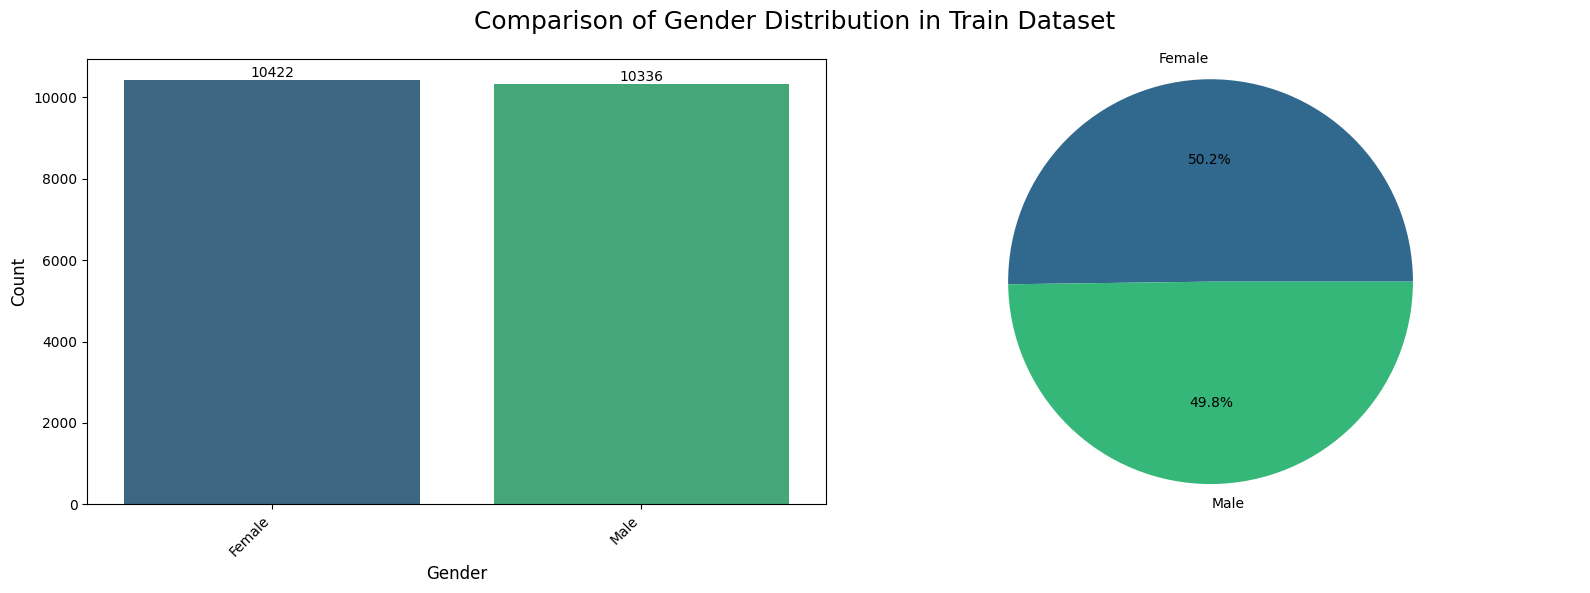

C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=ax1)
C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


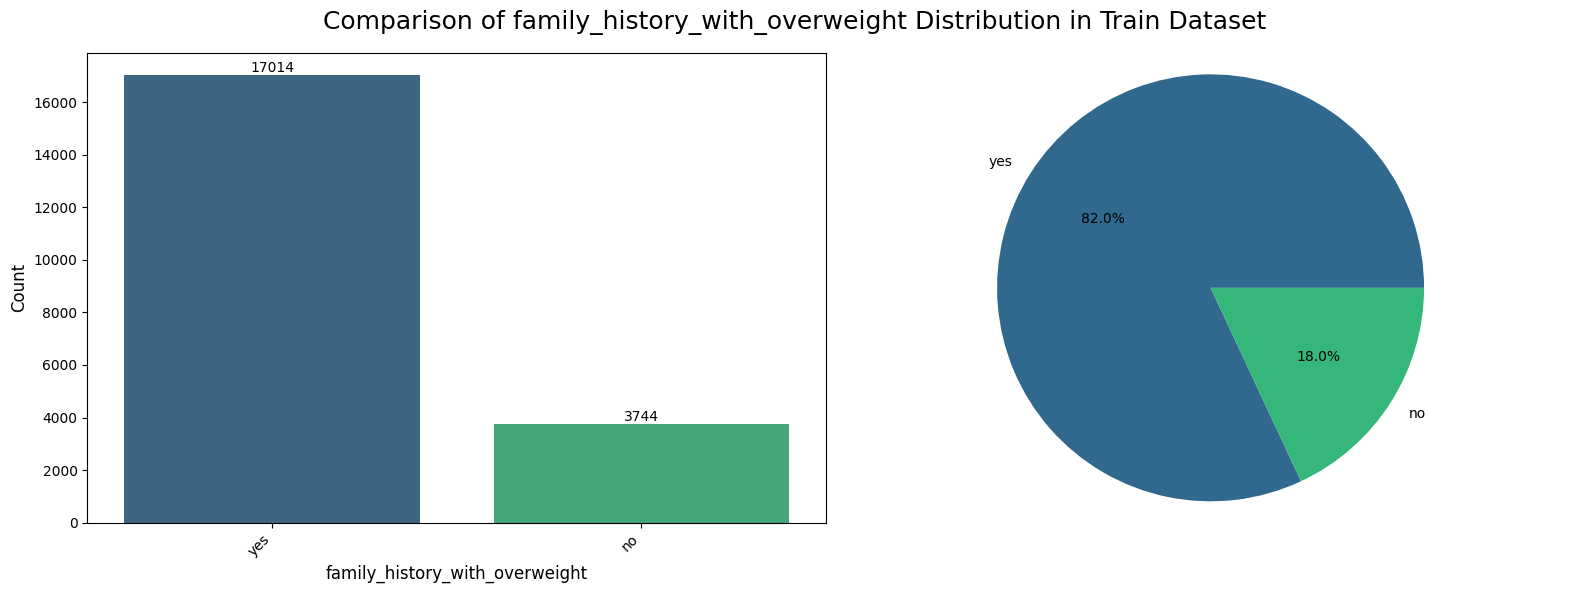

C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=ax1)
C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


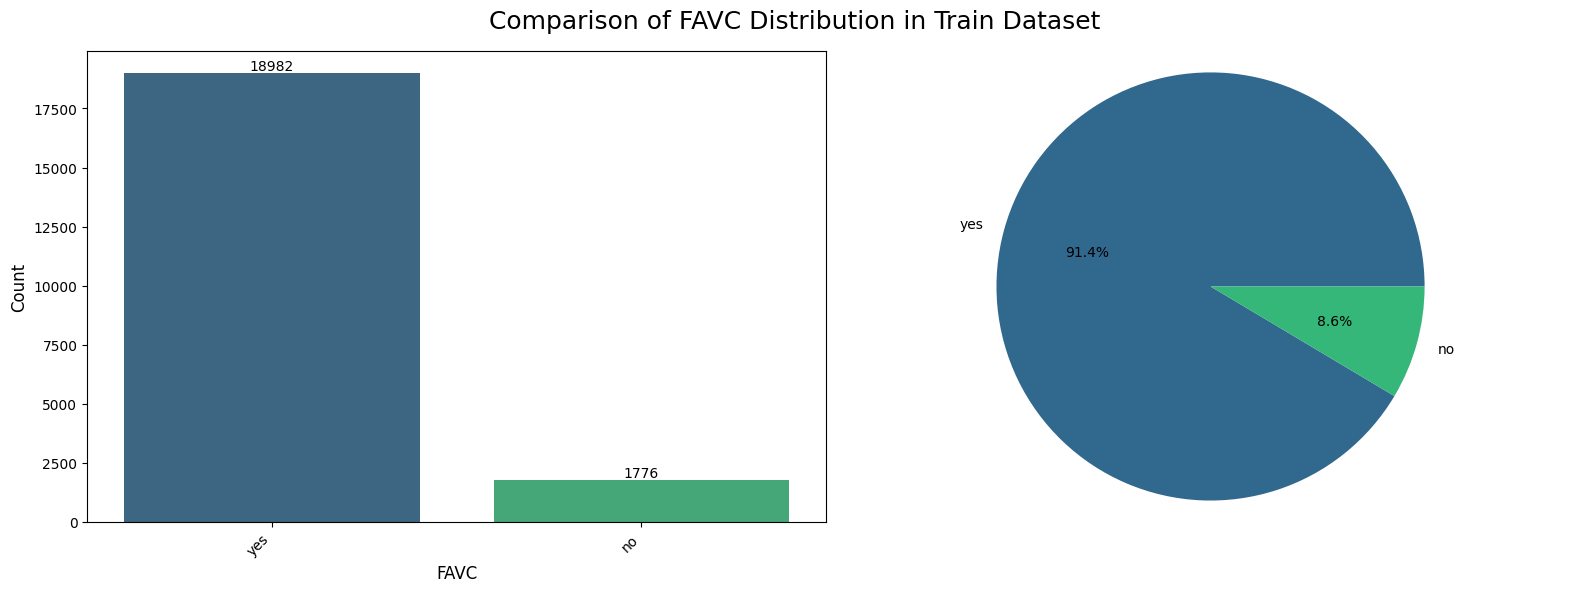

C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=ax1)
C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


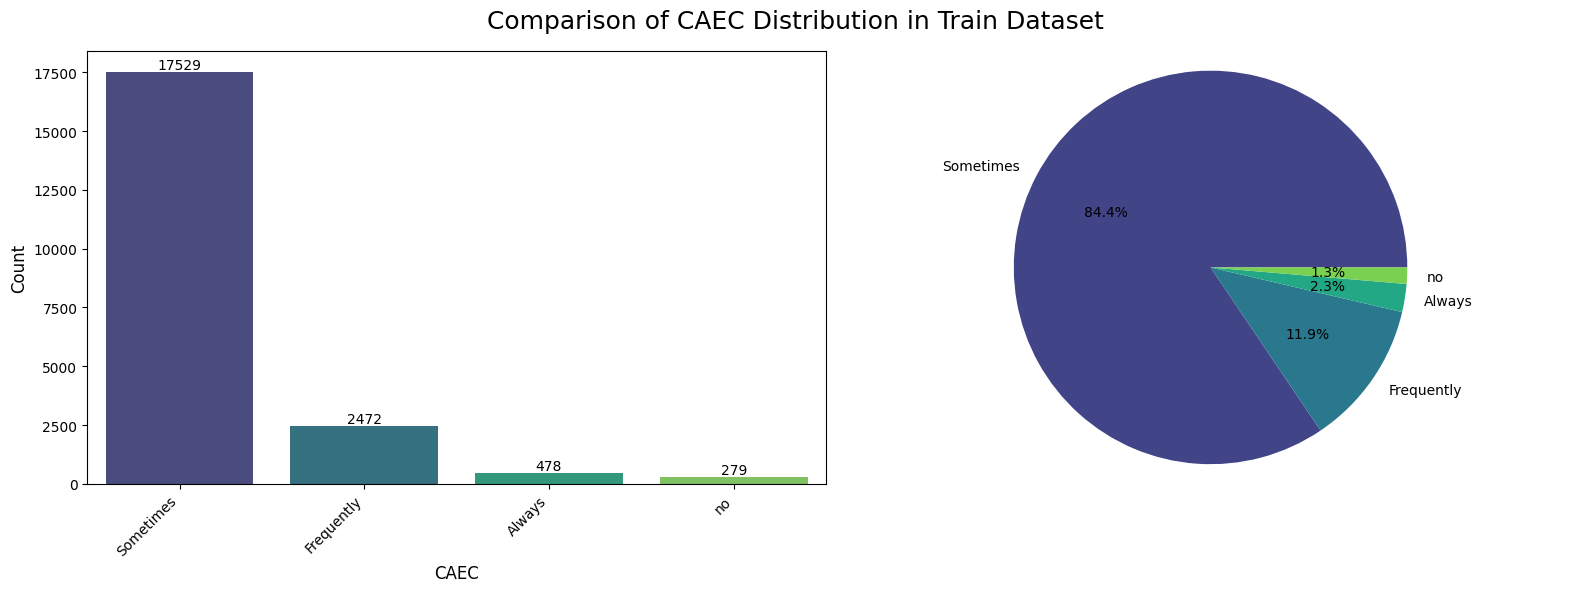

C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=ax1)
C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


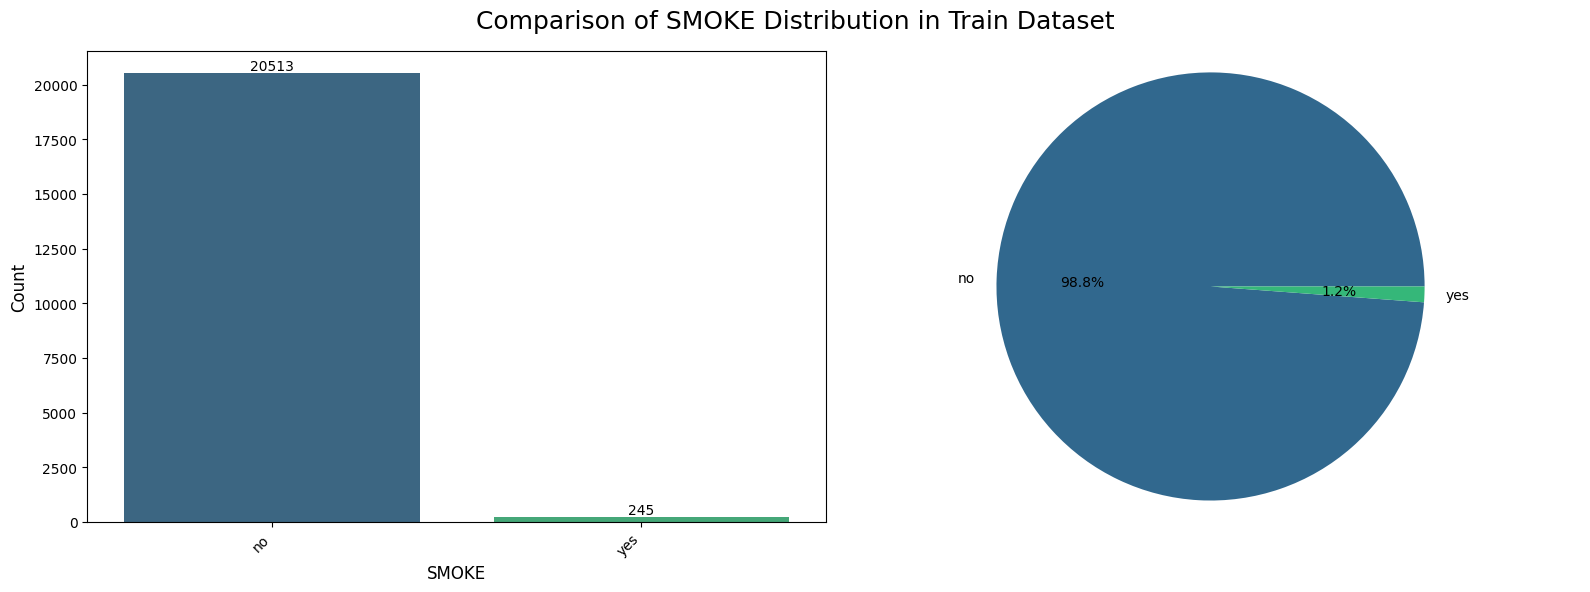

C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=ax1)
C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


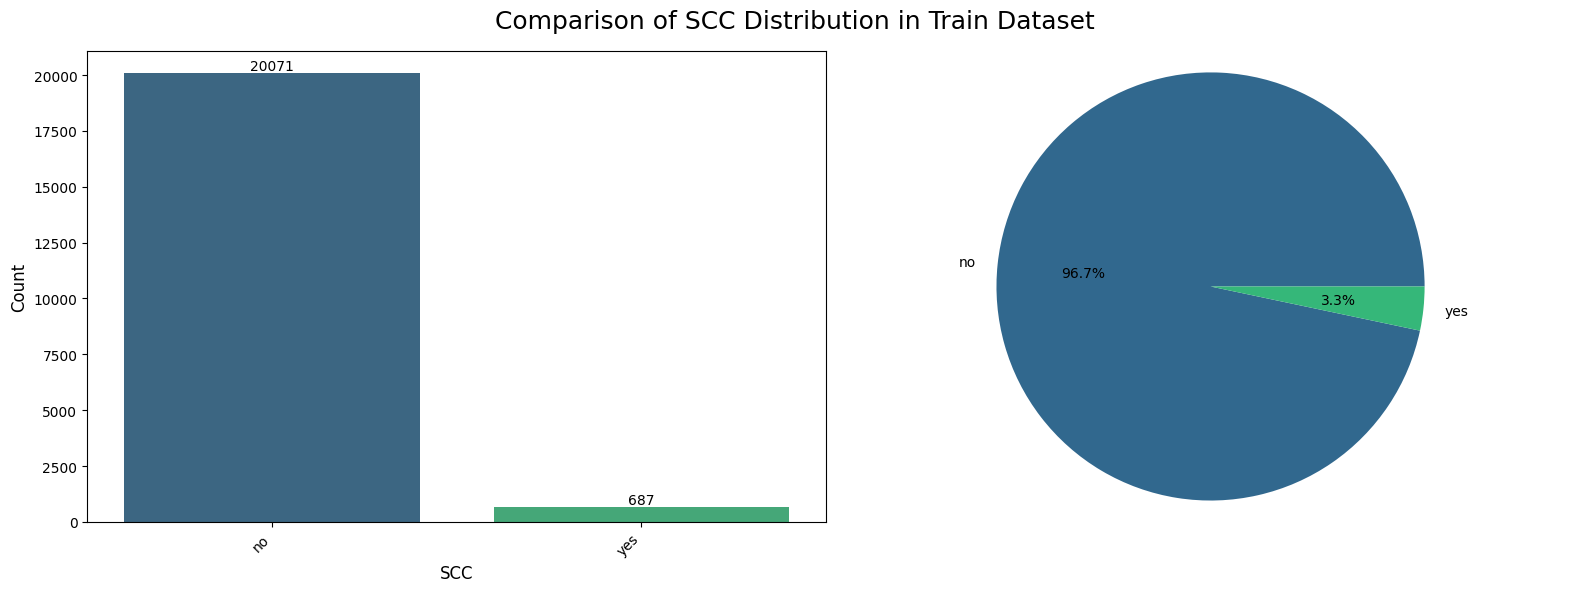

C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=ax1)
C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


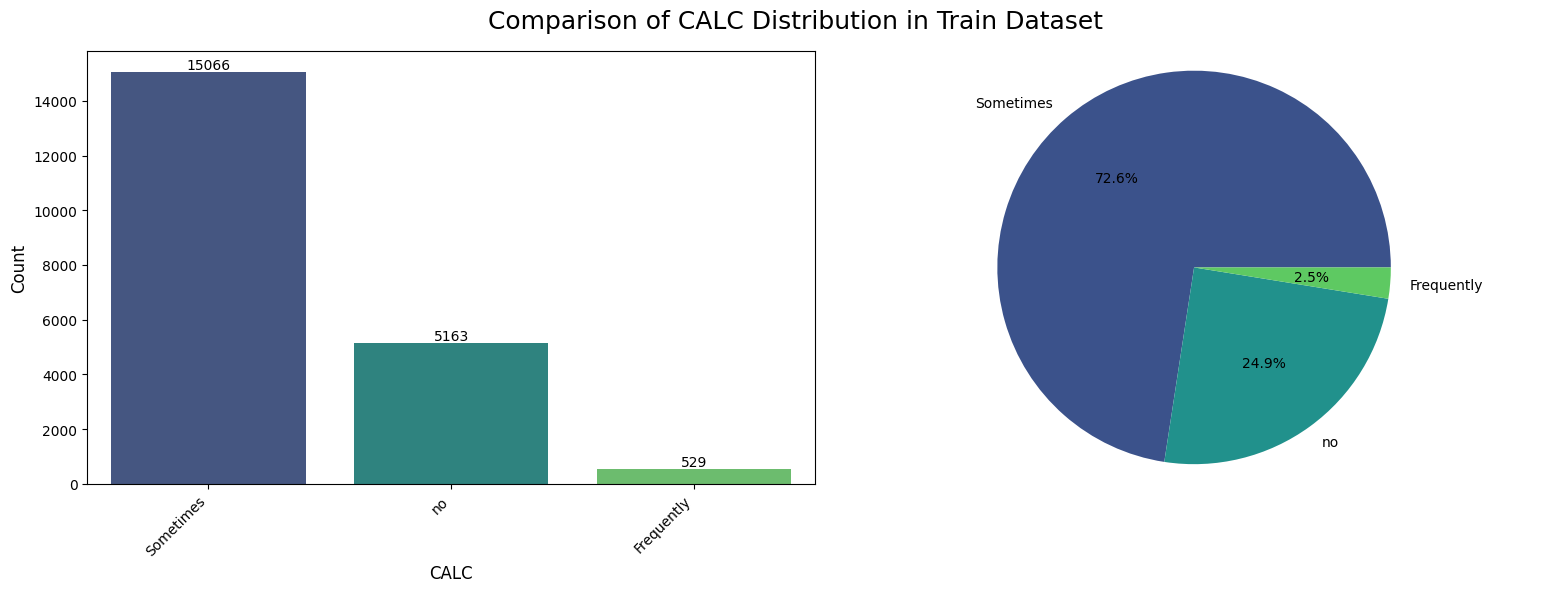

C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=ax1)
C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


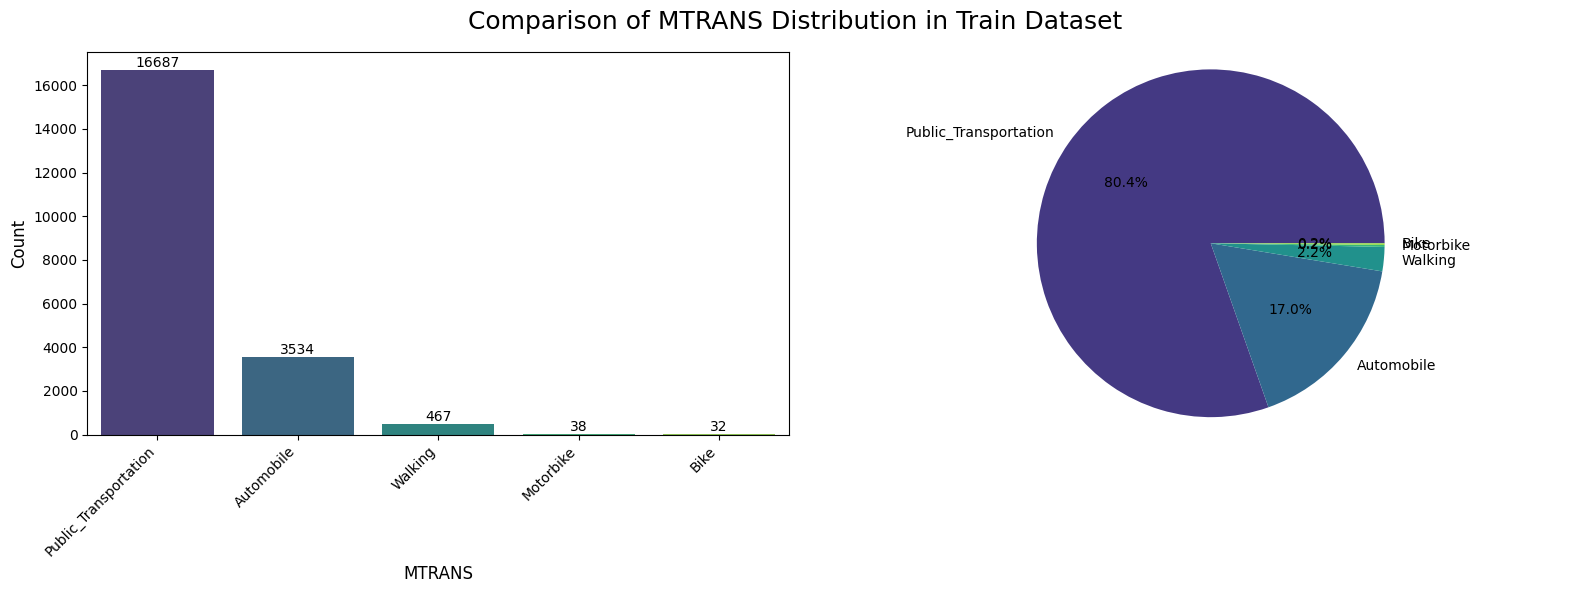

C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=ax1)
C:\Users\raul_\AppData\Local\Temp\ipykernel_27652\288632648.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)


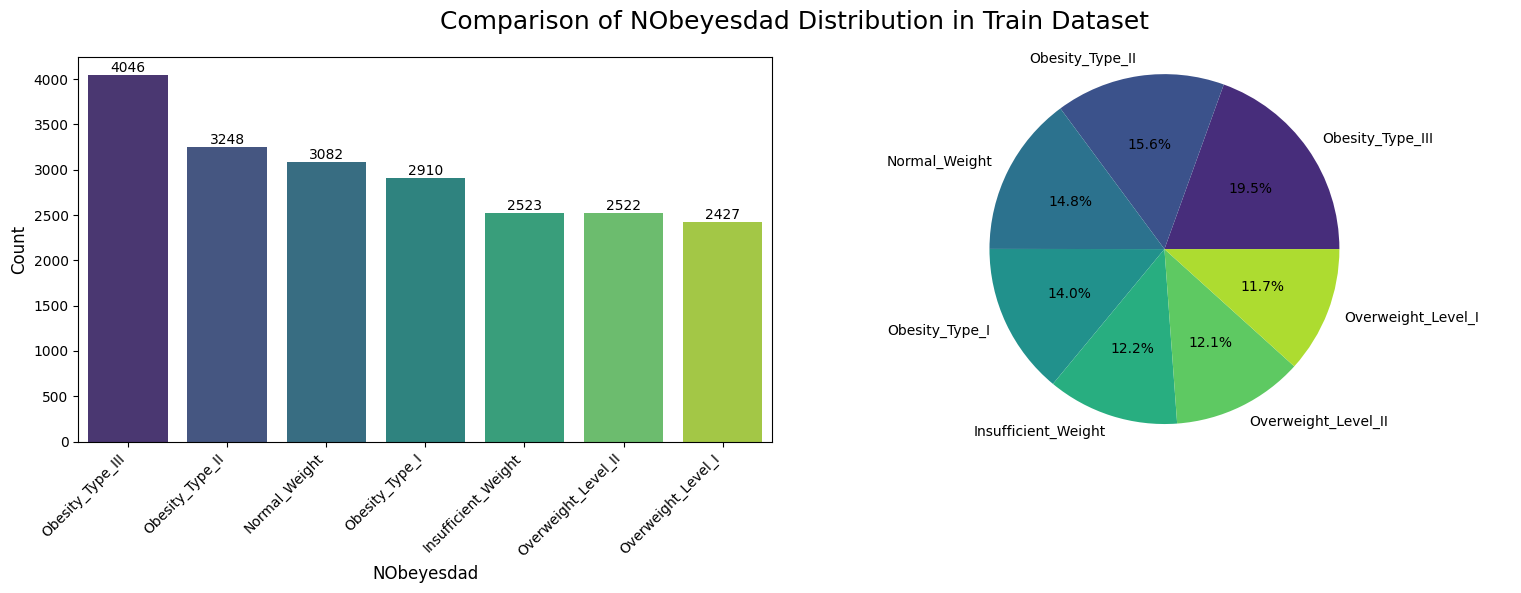

In [8]:
# for each categorical column plots the distribution of each value
for column in categorical_vars:
    plot_distribution(df, column)

### Insights from the categorical values
- Gender: Balanced
- Family history: Almost 82% have family with CVR risk
- High caloric consumption (FAVC): Almost 91% consume
- Food between meals (CAED):  85% sometimes eat between meals
- SMOKE: More than 98% smokes
- Calories (SCC) monitoring: 96% do not count calories
- Alcohol monitoring (CALC): 72% drinks alcohol sometimes
- Transportation (MTRANS): Most of people use public transportation
- **Most categorical variables tend to an specific value**


In [26]:
# Plot a histogram of a column with the amount of column for each obesity result
def plot_histograms_and_density(dataframe, column):
    fig, ax = plt.subplots(figsize=(16, 4))
    sns.histplot(data=dataframe, x=column, hue="NObeyesdad", bins=50, kde=True, palette=sns.color_palette("dark:#5A9_r", as_cmap=True))
    plt.ylim(0,5000)
    plt.show()


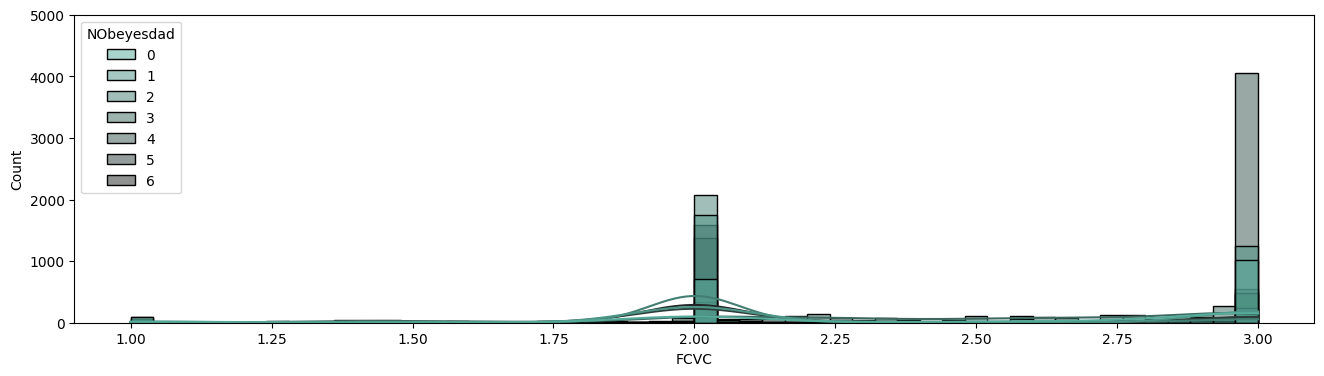

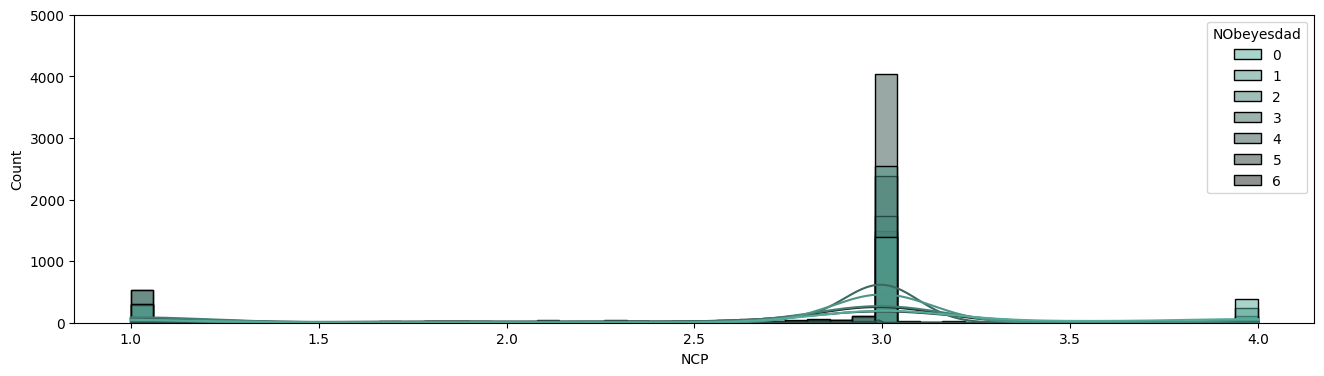

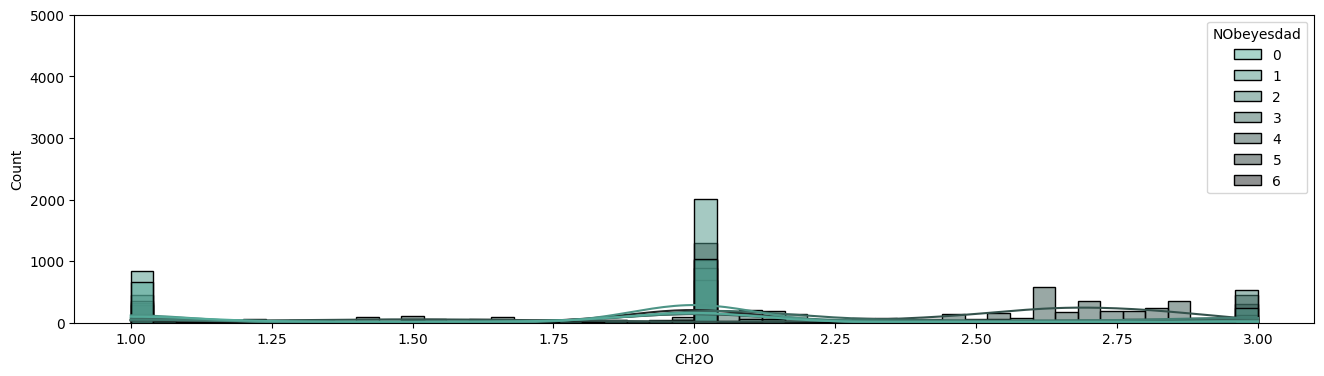

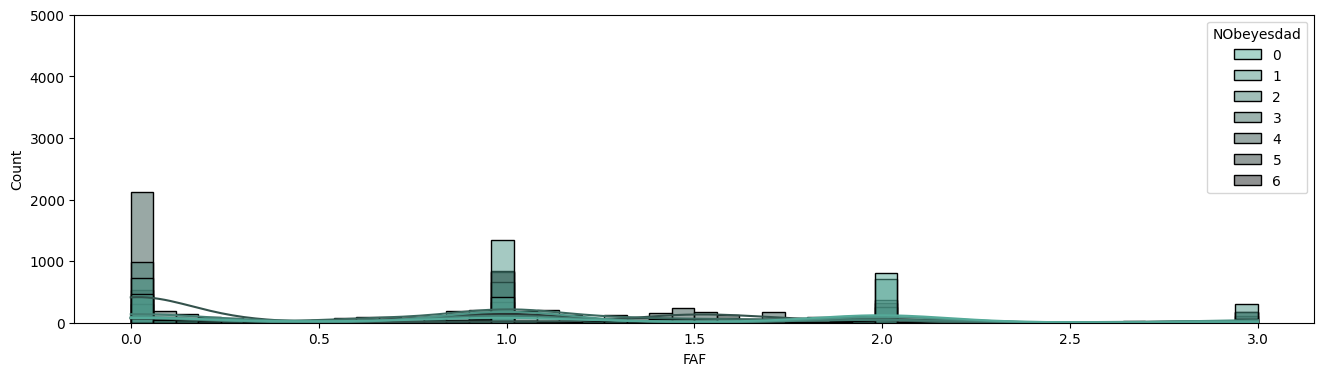

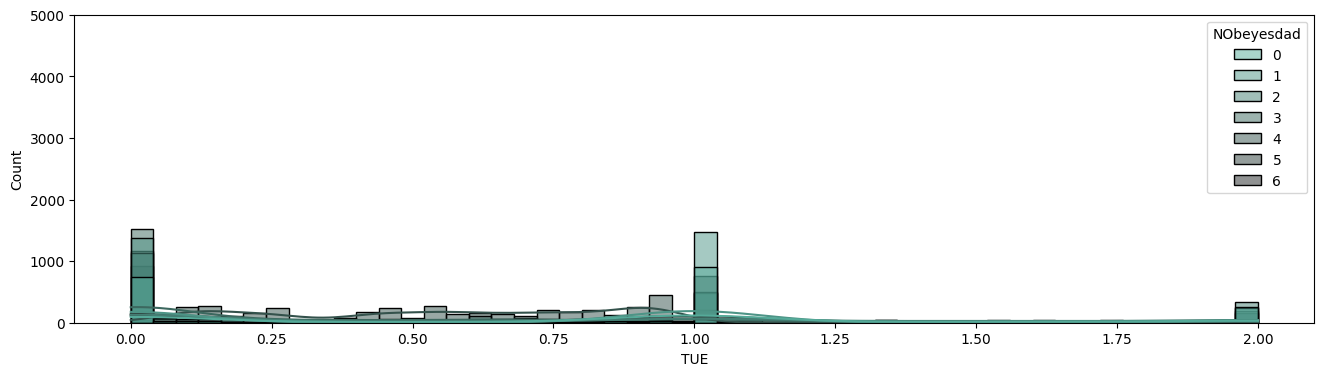

In [27]:
le = LabelEncoder()
df['NObeyesdad']=le.fit_transform (df['NObeyesdad'])

# FCVC: Vegetables
# NCP: Main meals
# CH20: Water consumption
# FAF: Physical activity frequency
# TUE: Time using technology devices

# Convert only letters to array
columns_to_plot = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for column in columns_to_plot:
    if column != 'id':
        plot_histograms_and_density(df, column)

### Insights from the numerical values
- Age: Higher ages tend to be have more CVR risk
- Height: There’s no a clear observation only with visual inspection
- Weight: Higher weights tends to be related with CVR risk characteristics
- FCVC (Vegetables): The vegetable consumption is not independently related to CVR risk diseases
- NCP (Main meals): Most people have 3 meals
- CH20: Rarely the CVR risk people have most of the distribution in (2,3)
- FAF (Physical Activity):
    - The chart clearly indicates that most of people with  CVR risk do not exercise
    - However, most of healthy people exercise 3 times a week
- TUE: There is no clear indicator, it’s somehow evenly distributed between (0,1)
- **Overall, numerical values do not offer explicit visual insight about their direct effect on CVD risk. The only numerical value with evident visual information is the FAF indicator**

In [44]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, pointbiserialr

# Compute correlation matrix for numerical variables
numerical_corr = df[continuous_vars].corr()

# Function to compute Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Compute Cramér's V for categorical variables
categorical_corr = pd.DataFrame(index=categorical_vars, columns=categorical_vars)
for col1 in categorical_vars:
    for col2 in categorical_vars:
        if col1 == col2:
            categorical_corr.loc[col1, col2] = 1.0
        else:
            categorical_corr.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Compute point biserial correlation for numerical-categorical pairs
num_cat_corr = pd.DataFrame(index=continuous_vars, columns=categorical_vars)
for num_col in continuous_vars:
    for cat_col in categorical_vars:
        num_cat_corr.loc[num_col, cat_col] = pointbiserialr(df[cat_col].astype('category').cat.codes, df[num_col])[0]

print("Numerical Correlation Matrix:")
print(numerical_corr)
print("\nCategorical Correlation Matrix (Cramér's V):")
print(categorical_corr)
print("\nNumerical-Categorical Correlation Matrix (Point Biserial):")
print(num_cat_corr)

Numerical Correlation Matrix:
              id       Age    Height    Weight      FCVC       NCP      CH2O  \
id      1.000000  0.007634  0.012041  0.014020  0.002098 -0.000332  0.007917   
Age     0.007634  1.000000 -0.011713  0.283381  0.034414 -0.048479 -0.016325   
Height  0.012041 -0.011713  1.000000  0.416677 -0.071546  0.191383  0.183706   
Weight  0.014020  0.283381  0.416677  1.000000  0.245682  0.095947  0.317914   
FCVC    0.002098  0.034414 -0.071546  0.245682  1.000000  0.113349  0.101299   
NCP    -0.000332 -0.048479  0.191383  0.095947  0.113349  1.000000  0.080949   
CH2O    0.007917 -0.016325  0.183706  0.317914  0.101299  0.080949  1.000000   
FAF     0.016719 -0.192259  0.295278 -0.084845 -0.089822  0.100871  0.082932   
TUE     0.007667 -0.296154  0.076433 -0.086471 -0.147843  0.067459 -0.010654   

             FAF       TUE  
id      0.016719  0.007667  
Age    -0.192259 -0.296154  
Height  0.295278  0.076433  
Weight -0.084845 -0.086471  
FCVC   -0.089822 -0.1478

### Correlation for variables

**_Numerical Variables_**
- Strong correlation is not found among numerical data

**_Categorical Variables (Cramér's V)_**
- Gender and CVR Risk present 0.6 
- Family History with Overweight and CVR Risk present 0.5 
- Strong correlation is not found among categorical data

**_Numerical-Categorical Correlation Matrix (Point Biserial)_**
- Height and gender present a correlation of 0.6, this is an expected value
- Weight and Family History with Overweight present a 0.5

### Conclusions

- In both numerical and categorical a strong correlation indicator was not found.
- Height and gender present a relatively strong correlation as expected.
- Weight and Family History with Overweight also present a relatively strong correlation, providing a insight about CVR risk and environment.
